In [6]:
%matplotlib inline

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


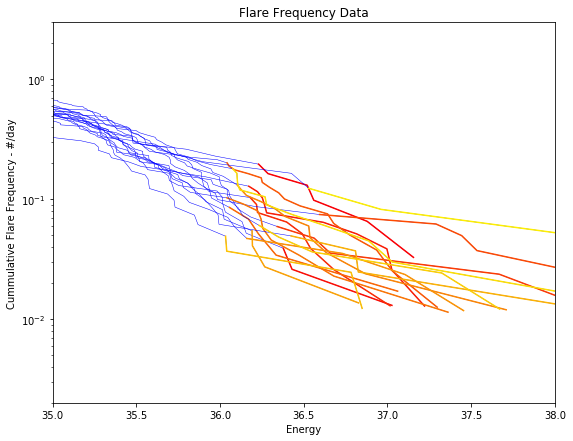

In [24]:
dir = '004349043' #StarID/directory
files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
EPOINT = 34.5 # but, actually it should be 34.5 or something

names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


plt.figure(figsize=(9,7))
plt.yscale('log')
plt.xlim(35,38)
plt.ylim(2e-3, 3e0)
plt.xlabel("Energy")
plt.ylabel("Cummulative Flare Frequency - #/day")
plt.title("Flare Frequency Data")
cmap = plt.cm.autumn

for x in range(len(files)):
    
    toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                            delim_whitespace=True, usecols=(7,)
                           ).iloc[0].values[0] #work some magic to get the total duration, found in each flare file
    df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
    energy = df['Equiv_Dur']
    sort = np.argsort(energy)

    ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT#+ EPOINT
    ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur


    plt.plot(ffd_xEnergy, ffd_yFrequency, lw = .5, c = 'blue')
    ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i']))+ EPOINT#add Epoint

    plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x / float(len(files))))
    

#todo:
#1 fix scale
#2 Comment
#3 fix color scheme



In [ ]:
\
#info for future tasks:
#two values from each file, mean of tstart, ffd_y associated with a fixed energy ffd_x. pick an x value and for every file
#report the corresponding y value and then plot the avg start time against the y value.

#hints: use np.interp to get the FFD_Y value that exactly corresponds to a specific FFD_X